## Singular Value Decomposition

$$X=U\Sigma V^T$$  
where:  
$X \in M_{mxn}$  
$U \in Q_{mxm}$  
$\Sigma \in D_{mxn}$  
$V^T \in Q_{nxn}$

### Properties of matrices with orthonormal vecrors

$$U^T=U^{-1}$$  
$$UU^T=I$$  
$$U^TU=I$$  
$$V^T=V^{-1}$$  
$$VV^T=I$$  
$$V^TV=I$$

### Properties of diagonal matrices

$$\Sigma=\Sigma^T$$  
$$\sigma_{ij}^{-1}=
\left\{ 
\begin{array}{ c l }
0 \quad \forall i\neq j\\
\frac{1}{\sigma_{ij}}\quad \forall i=j
\end{array}
\right.$$

### Basic least squares

$$X^TXw=X^Ty$$  
where:  
$X$ is a design matrix  
$w$ is a vector with coefficients (unknowns)  
$y$ is a target vector

$$(U\Sigma V^T)^TU\Sigma V^Tw=(U\Sigma V^T)^Ty$$  
$$V\Sigma^TU^TU\Sigma V^Tw=V\Sigma^TU^Ty$$

$$V\Sigma^T\Sigma V^Tw=V\Sigma^TU^Ty$$

$$\Sigma V^Tw=U^Ty$$

$$V^T=V^{-1}$$  
$$(V^T)^{-1}=(V^T)^T=V$$

$$w=V\Sigma^{-1} U^Ty$$

In [1]:
import numpy as np
from sklearn import datasets
# Import the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
# Decompose the design matrix
U, s, Vt = np.linalg.svd(X, full_matrices=False)
# Create Sigma matrix from 1D array
sigma = np.diag(s)
# Calculate sigma inverse
sigma_inv = np.diag(1/s)
# Dot product of V and sigma inverse
Vsigma_inv = np.dot(Vt.T, sigma_inv)
# Dot product of U transpose and target vector
UTy = np.dot(U.T, y)
# Calculate coefficients
w = np.dot(Vsigma_inv, UTy)
print('Resulting coefficients')
print('----------------------')
print(w)

Resulting coefficients
----------------------
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
# Import the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
# Instantiate an instance of LinearRegression class
reg = LinearRegression(fit_intercept=False)
# Fit the regressor
reg.fit(X, y)
print('Resulting coefficients from LinearRegression class')
print('----------------------')
print(reg.coef_)

Resulting coefficients from LinearRegression class
----------------------
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


## Why linear regression fails

$$
\underset{w}{min}\Vert Xw-y\Vert_2^2+ \alpha \Vert w\Vert^2_2
$$  
where:  
$X \in \mathbb{R}^{mxn}$,  
$w \in \mathbb{R}^n$,  
$y \in \mathbb{R}^m$  
$\alpha \in \mathbb{R}_+$ 

# SVD with a penalty term

$$w=V(\Sigma(\Sigma^{-1}\Sigma^{-1}+\alpha)) U^Ty$$

$$\Sigma\Sigma^{-1}\Sigma^{-1}=I\Sigma^{-1}=\Sigma^{-1}$$

$$\Sigma(\Sigma^{-1}\Sigma^{-1}+\alpha)$$

In [196]:
import numpy as np

class TikhonovRegularization:
    
    def __init__(self, fit_intercept=True, alpha=1):
        self.fit_intercept = fit_intercept
        self.alpha = alpha
    
    def fit(self, X, y):
        
        X = X.astype(float)
        y = y.astype(float)
        
        if self.fit_intercept == True:

            X_average = np.mean(X, axis=0)
            X = X - X_average
            y_average = np.mean(y)
            y = y - y_average
            
            # Decompose the design matrix
            U, s, Vt = np.linalg.svd(X, full_matrices=False)
            # Create Sigma matrix from 1D array
            sigma = np.diag(s)
            # Create a Sigma squared matrix
            sigma_sq = np.dot(sigma, sigma)
            # Apply penalty to the singular values
            sigma_a = sigma_sq + np.identity(sigma.shape[0]) * self.alpha
            # Calculate inverse
            sigma_a_inv = np.diag(1/np.diag(sigma_a))
            sigma_penilized = np.dot(sigma, sigma_a_inv)
            # Dot product of V and sigma inverse
            Vsigma_inv_a = np.dot(Vt.T, sigma_penilized)
            # Dot product of U transpose and target vector
            UTy = np.dot(U.T, y)
            # Calculate coefficients
            self.coef = np.dot(Vsigma_inv_a, UTy)
            self.intercept = y_average - np.dot(X_average, self.coef.T)
        else:
            # Decompose the design matrix
            U, s, Vt = np.linalg.svd(X, full_matrices=False)
            # Create Sigma matrix from 1D array
            sigma = np.diag(s)
            # Create a Sigma squared matrix
            sigma_sq = np.dot(sigma, sigma)
            # Apply penalty to the singular values
            sigma_a = sigma_sq + np.identity(sigma.shape[0]) * self.alpha
            # Calculate inverse
            sigma_a_inv = np.diag(1/np.diag(sigma_a))
            sigma_penilized = np.dot(sigma, sigma_a_inv)
            # Dot product of V and sigma inverse
            Vsigma_inv_a = np.dot(Vt.T, sigma_penilized)
            # Dot product of U transpose and target vector
            UTy = np.dot(U.T, y)
            # Calculate coefficients
            self.coef = np.dot(Vsigma_inv_a, UTy)
            self.intercept = 0
         
        return self
    
    def predict(self, X):
        
        y_pred = np.dot(X, self.coef.T) + self.intercept    
        return y_pred
    
    def score(self, X, y):
        
        y_pred = self.predict(X)
        numerator = ((y - y_pred)**2).sum()
        denominator = ((y - np.mean(y))**2).sum()
        score = 1 - (numerator/denominator)
        return score

In [199]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
reg = TikhonovRegularization(fit_intercept=True, alpha=0.11)
reg.fit(X_train,y_train)
r2 = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
print('Coefficient of determination\nTraining set')
print('--------------------------')
print(r2)
print('__________________________')
print('Coefficient of determination\nTesting set')
print('--------------------------')
print(r2_test)

Coefficient of determination
Training set
--------------------------
0.5065355183228828
__________________________
Coefficient of determination
Testing set
--------------------------
0.5251192874468369


In [209]:
from sklearn.linear_model import Ridge

np.allclose(
    TikhonovRegularization(fit_intercept=True, alpha=0.11).fit(X_train,y_train).coef,
    Ridge(fit_intercept=True, alpha=0.11, solver='svd').fit(X_train,y_train).coef_
)

True

In [323]:
alphas = np.arange(0,40,0.01)
coefs = list()
for i in alphas:
    coefs.append(TikhonovRegularization(fit_intercept=True, alpha=i).fit(X_train,y_train).coef)
    

In [324]:
import matplotlib.pyplot as plt

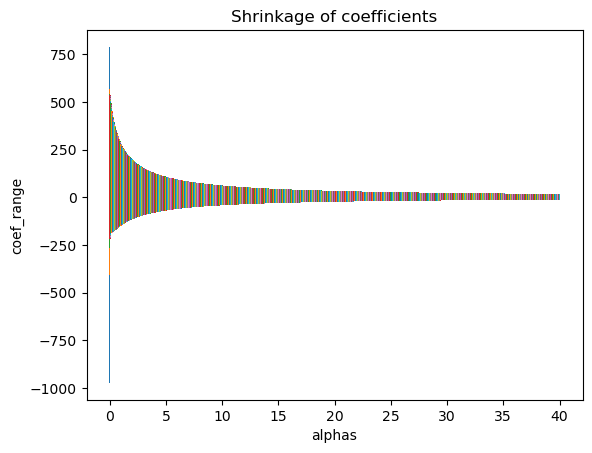

In [325]:
for coef, alpha in zip(coefs, alphas):
    plt.bar(x = alpha,height=coef, width=0.1);
plt.xlabel('alphas')
plt.ylabel('coef_range')
plt.title('Shrinkage of coefficients');